# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     2.958753e+01     6.333081e+00
 * time: 0.004297018051147461
     1     2.662455e+01     6.076741e+00
 * time: 0.013229846954345703
     2     2.481522e+01     1.294730e+01
 * time: 0.03555488586425781
     3     1.290109e+01     2.589757e+00
 * time: 0.1288909912109375
     4     1.224218e+01     2.553482e+00
 * time: 0.1453099250793457
     5     1.157473e+01     1.625886e+00
 * time: 0.16165590286254883
     6     1.023855e+01     1.647430e+00
 * time: 0.17940282821655273
     7     9.757772e+00     1.392480e+00
 * time: 0.19783902168273926
     8     9.616369e+00     1.095186e+00
 * time: 0.21457600593566895
     9     9.574725e+00     9.390839e-01
 * time: 0.22702789306640625
    10     9.534272e+00     5.791243e-01
 * time: 0.2401719093322754
    11     9.466456e+00     7.071910e-01
 * time: 0.25310683250427246
    12     9.420632e+00     4.953763e-01
 * time: 0.27016401290893555
    13     9.327805e+00     7.771988e-01
 * time: 

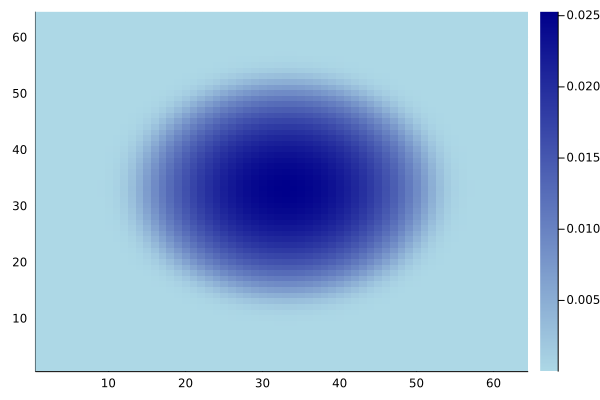

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)